In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
recipes = pd.read_csv('../whats_in_the_fridge/data/recipes_clean_w_rfc_model.csv')
recipes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
colors = ['#61de2a','#029386','#04d9ff','#601ef9','#0652ff','#15b01a','#04d8b2','#6140ef','#056eee','#06b48b',
          '#12e193','#58bc08','#13eac9','#703be7','#3d7afd','#137e6d','#3f9b0b','#137e6d','#047495','#40a368',
          '#632de9','#0a888a','#0b8b87','#5d06e9','#6a79f7','#12e193','#01a049','#1fa774','#05696b','#048243',
          '#665fd1','#5539cc','#510ac9','#017b92','#18d17b','#5f34e7','#6d5acf','#01889f','#661aee','#2ee8bb',
          '#69d84f','#08787f','#6832e3','#06c2ac']

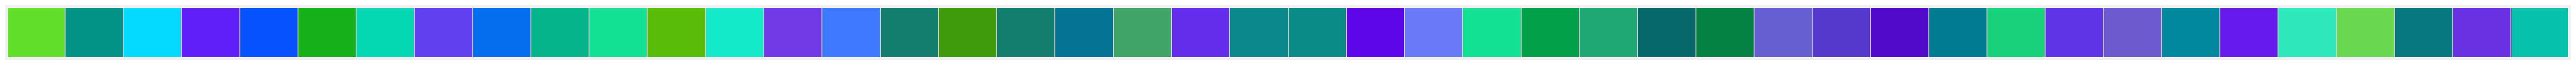

In [4]:
sns.palplot(colors)

# Whats in the Fridge??

In [5]:
def food_network(data):

#####################################################################
    # narrow the number of recipes in our dataframe by search input
    # using the search input to subset the recipes dataframe
    # based on keyword matches in recipe name, categories, or ingredients
#####################################################################

    print '\n================================================================\n'
    print "- Search recipes by ingredient, cuisine, type of food, or keyword!"
    print " (e.g. tomato, salmon, mushroom, pizza, breakfast, asian, philly, carbonara, red velvet, scramble, etc.)"
    print "- Add as many ingredients/categories/keywords as you want!"
    print "- Once satisfied with the number recipes you have, hit 'return' to see your results\n\n---------------"
    
    # initiate a while loop for processing category input based on the shape of recipes    
    while True:
        
        # raw input for category
        keyword = raw_input('Search: ')
        keyword = keyword.lower()
        keyword_name = keyword.upper()
        
        # initiate a list to keep track of keyword matches in recipes.name
        # will use this later to subset recipes and merge with category matches
        indx_name = [[i,x] for i,x in enumerate(data.name) if x.find(keyword_name) != -1]
        indices_name = [i for i,x in indx_name]
        
        # do the same for keyword matches in recipes.ingredients
        indx_ingredients = [[i,x] for i,x in enumerate(data.ingredients) if x.find(keyword) != -1]
        indices_ingredients = [i for i,x in indx_ingredients]
        
        # combine the two lists of indices
        indices = indices_name
        for i in indices_ingredients:
            if i not in indices:
                indices.append(i)
            else:
                pass 
        
        # if the search input is blank ("") break the while loop and proceed to sorting/graphing
        if keyword == '':
            data = data
            print 'Gathering recipes...\n'
            time.sleep(1)
            break
        
        # if search input is not a valid value in either name, ingredients or categories, go back through the loop
        elif data[(data.category_1.isin([keyword])|
                   data.category_2.isin([keyword])|
                   data.category_3.isin([keyword]))].shape[0] == 0 and len(indices) == 0:
            
            print 'No matches for "%s"!' % keyword, '\n---------------'
        
        # else, if search input is a valid value in name, ingredients, or categories,
        # subset data to include recipes with that keyword
        else:
            data_category = data[(data.category_1.isin([keyword])|
                                  data.category_2.isin([keyword])|
                                  data.category_3.isin([keyword]))]
            
            data_keyword = data.iloc[indices,:]
            data = pd.merge(data_keyword, data_category, how='outer')
            print '%s recipes: ' % keyword, data.shape[0], '\n---------------'
    
    print '================================================================'  

#####################################################################
    # sort results
#####################################################################
    
    # prompt the user for an ordering method
    print "Select an ordering method:\n"
    print "1 --> user ratings (popularity)\n2 --> user rating (quality)\n3 --> projected rating\
    \n4 --> time\n5 --> ingredients\n6 --> difficulty\nhit 'return' to skip\n"
    
    sort_method = raw_input('Ordering Method: ')
    
    print '\n================================================================\n'

    # sort recipes based on the sorting method requested, else, sort by # of ratings
    if sort_method == '4':
        data = data.sort_values('time_total', ascending=True)
    elif sort_method == '6':
        data = data.sort_values('difficulty_scale', ascending=True)
    elif sort_method == '5':
        data = data.sort_values('ingredients_num', ascending=True)
    elif sort_method == '2':
        data = data.sort_values('rating', ascending=False)
    elif sort_method == '1':
        data = data.sort_values('ratings', ascending=False)
    elif sort_method == '3':
        data= data.sort_values('rating_rfc_predict', ascending=False)
    else:
        data = data.sort_values('ratings', ascending=False)

#####################################################################
    # graph everything
#####################################################################

    # initiate a graphs list for looping through
    graphs = ['ratings','rating','rating_rfc_predict_rating','time_total','ingredients_num','difficulty_scale']

    # initiate figure with subplots and tight_layout() so they are not stacked on top of each other
    f, axs = plt.subplots(6, figsize=(8,12))
    f.tight_layout()
    # adds extra distance on top of each graph for separation between axis & title
    f.subplots_adjust(top=1.5)

    # loop through graphs and plot each one
    for i, col in enumerate(graphs):
        sns.barplot(x=col, y='name', data=data, palette=colors, ax=axs[i])
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')

    # set the title for each graph
    axs[0].set_title('Ratings')
    axs[1].set_title('Rating (0-5)')
    axs[1].set_xlim([0,5])
    axs[2].set_title('Projected Rating (3-5)')
    axs[2].set_xlim([0,5])
    axs[3].set_title('Total Time (minutes)')
    axs[4].set_title('Ingredients')
    axs[5].set_title('Difficulty (1=Easy, 2=Intermediate, 3=Advanced, 4=Expert, 0=Unknown)')
    axs[5].set_xlim([0,4])

    plt.show()

    print '================================================================'
    print 'Recipe List\n================================================================'
    
    for i in range(data.shape[0]):
        print data.iloc[i,5]
        print data.iloc[i,12], '\n'
        
    print '================================================================'
    print 'Recipe Details\n================================================================'
    
#####################################################################
    # print everything
#####################################################################

    # print out all pertinent info on each recipe
    for i in range(data.shape[0]):
        print data.iloc[i,5], '\nfrom', data.iloc[i,1].upper(), '\n' # Name and chef
        print 'Projected Rating: %s' % data.iloc[i,20]
        print 'Rating: ', data.iloc[i,6]
        print 'Ratings: ', data.iloc[i,7], '\n'
        print 'Yield: ', data.iloc[i,13], '\n'
        print 'Ingredients: ', (int(data.iloc[i,14])), '\n'
        print 'Difficulty Level:', data.iloc[i,2]
        print '       Prep Time: %s' % data.iloc[i,10]
        print '   Inactive Time: %s' % data.iloc[i,9]
        print '       Cook Time: %s' % data.iloc[i,8]
        print '           Total: %s minutes' % data.iloc[i,11]
        print '\n', data.iloc[i,12], '\n' # url
        print '================================================================\n'
        



- Search recipes by ingredient, cuisine, type of food, or keyword!
 (e.g. tomato, salmon, mushroom, pizza, breakfast, asian, philly, carbonara, red velvet, scramble, etc.)
- Add as many ingredients/categories/keywords as you want!
- Once satisfied with the number recipes you have, hit 'return' to see your results

---------------
Search: pumpkin
pumpkin recipes:  763 
---------------
Search: stew
stew recipes:  16 
---------------
Search: beef
beef recipes:  5 
---------------
Search: 
Gathering recipes...

Select an ordering method:

1 --> user ratings (popularity)
2 --> user rating (quality)
3 --> projected rating    
4 --> time
5 --> ingredients
6 --> difficulty
hit 'return' to skip

Ordering Method: 1




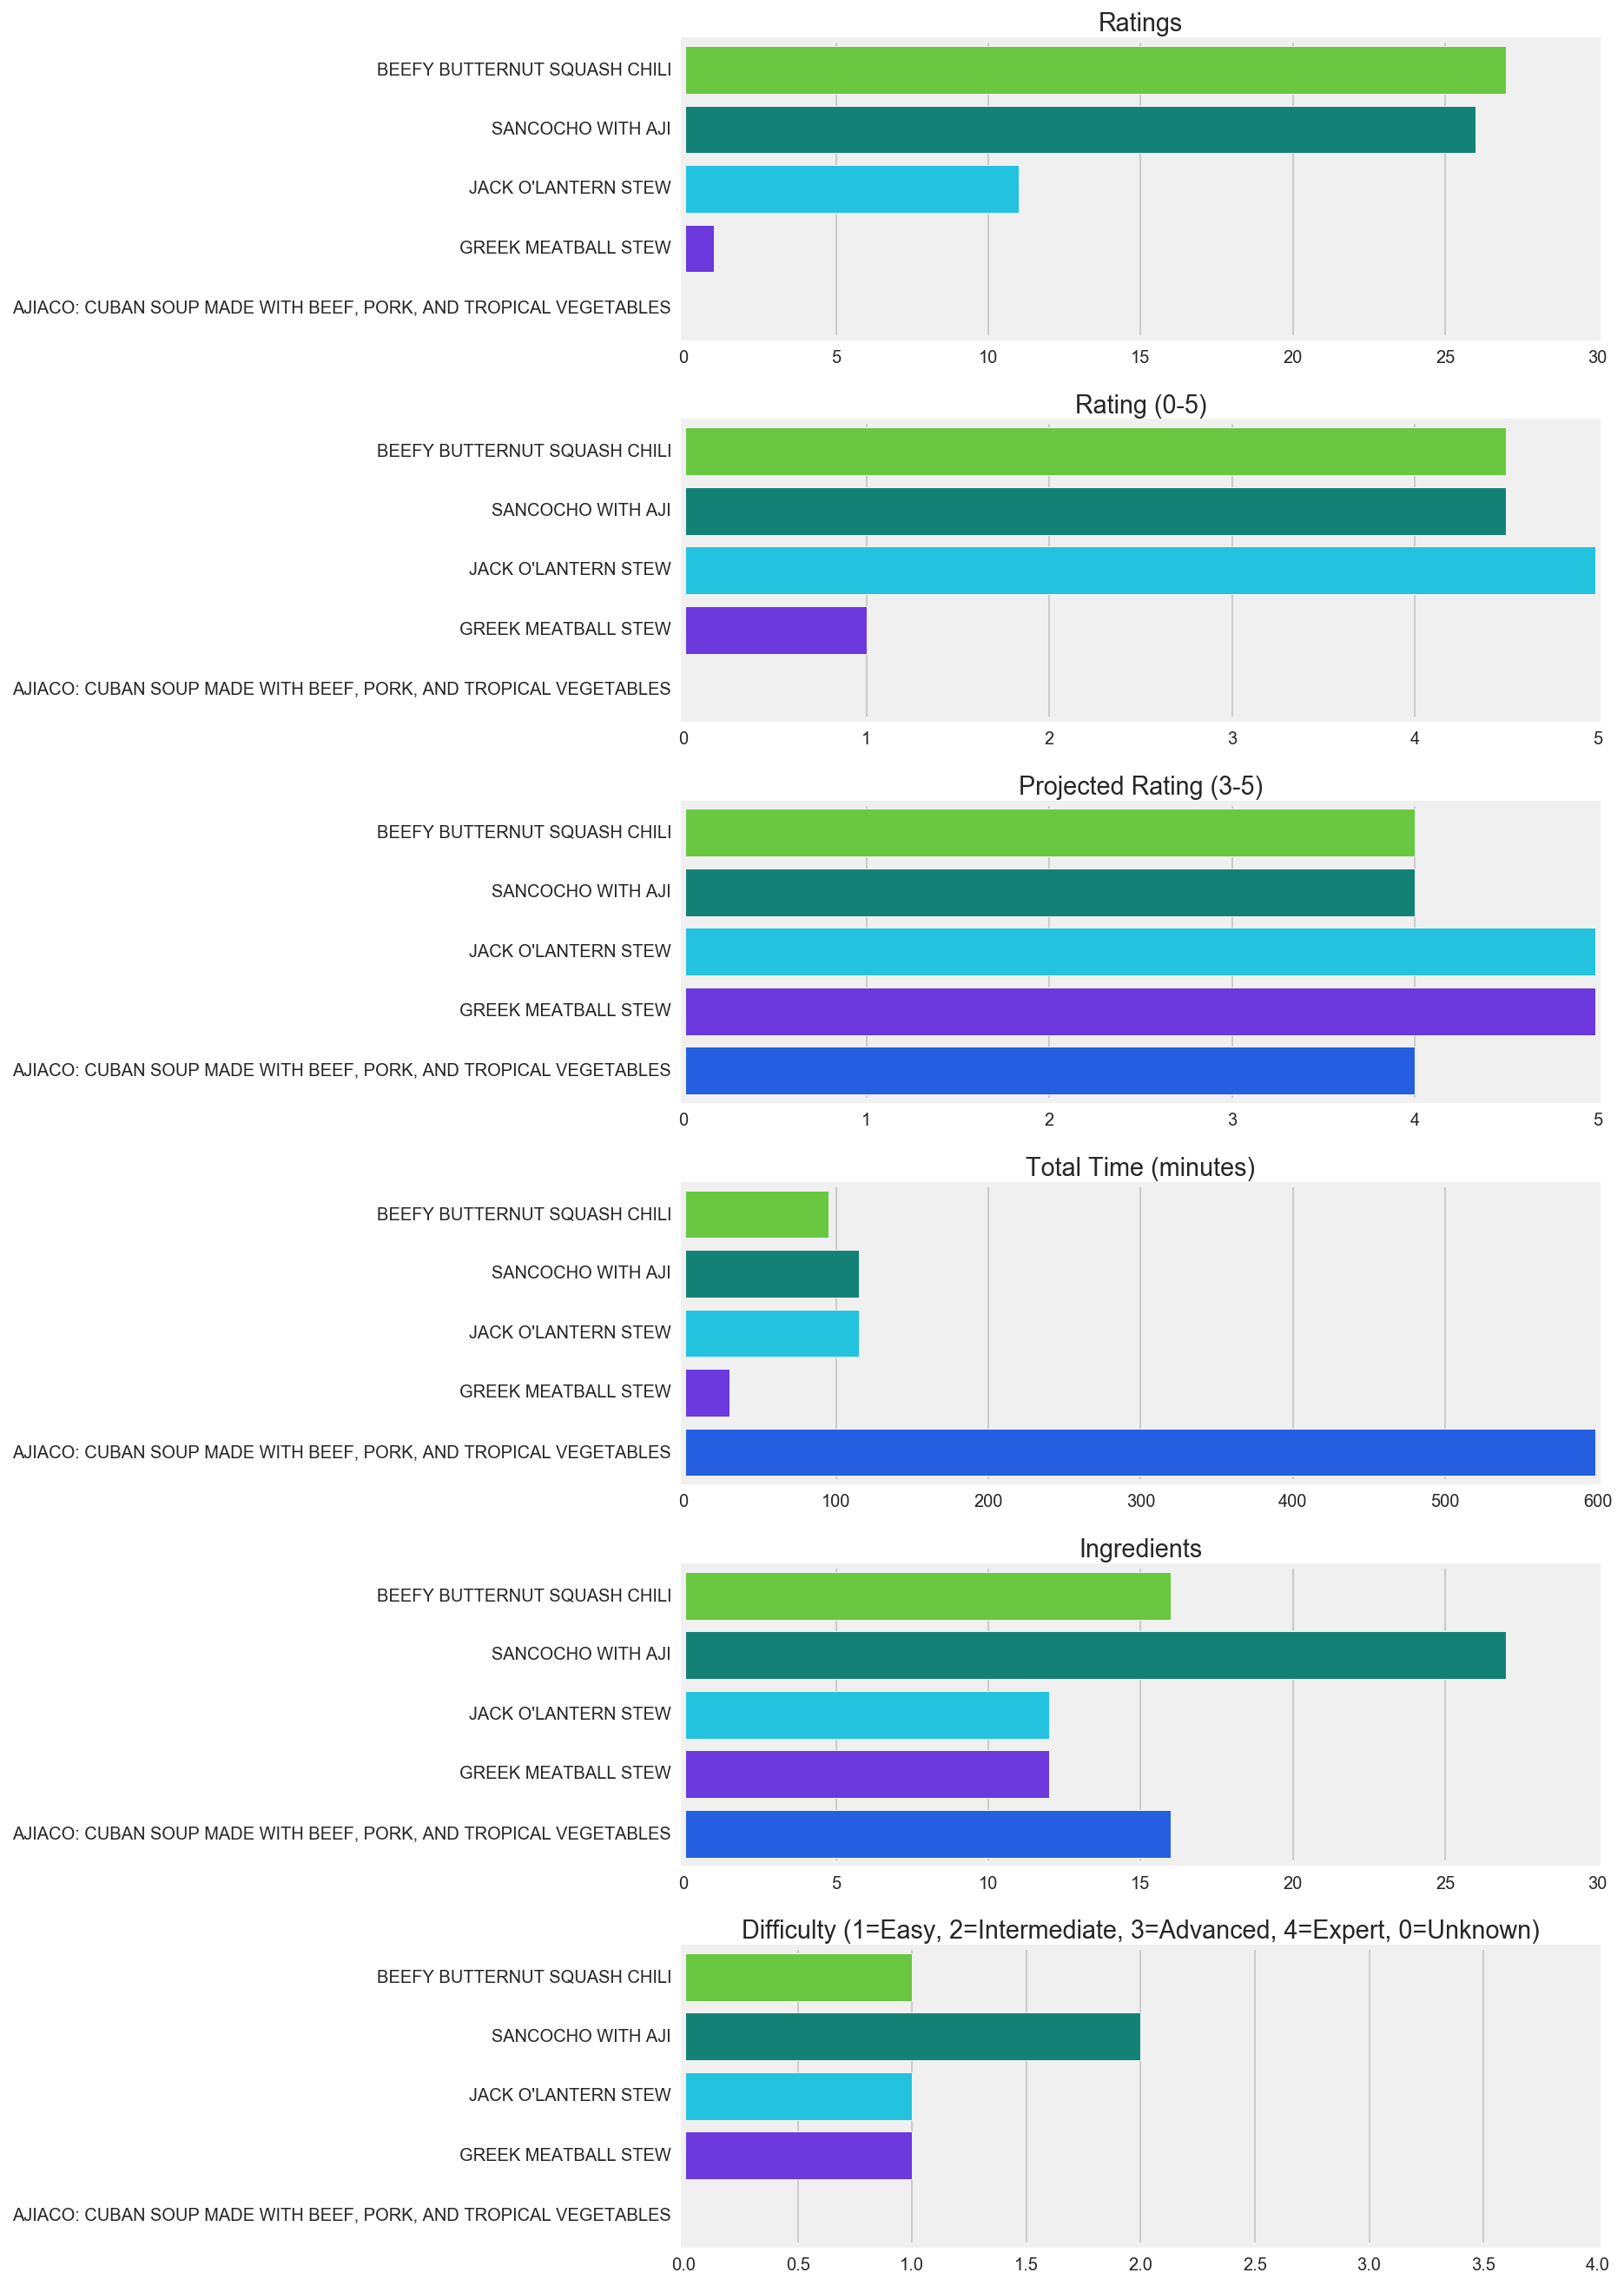

Recipe List
BEEFY BUTTERNUT SQUASH CHILI
http://www.foodnetwork.com/recipes/sunny-anderson/beefy-butternut-squash-chili-recipe.html 

SANCOCHO WITH AJI
http://www.foodnetwork.com/recipes/ingrid-hoffmann/sancocho-with-aji-recipe.html 

JACK O'LANTERN STEW
http://www.foodnetwork.com/recipes/jack-olantern-stew-recipe.html 

GREEK MEATBALL STEW
http://www.foodnetwork.com/recipes/food-network-kitchens/greek-meatball-stew-recipe.html 

AJIACO: CUBAN SOUP MADE WITH BEEF, PORK, AND TROPICAL VEGETABLES
http://www.foodnetwork.com/recipes/ajiaco-cuban-soup-made-with-beef-pork-and-tropical-vegetables-recipe.html 

Recipe Details
BEEFY BUTTERNUT SQUASH CHILI 
from SUNNY ANDERSON 

Projected Rating: 4.0
Rating:  4.5
Ratings:  27.0 

Yield:  6 to 8 servings 

Ingredients:  16 

Difficulty Level: Easy
       Prep Time: 20.0
   Inactive Time: 0.0
       Cook Time: 75.0
           Total: 95.0 minutes

http://www.foodnetwork.com/recipes/sunny-anderson/beefy-butternut-squash-chili-recipe.html 


SANCOCHO 

In [39]:
food_network(recipes)



- Search recipes by ingredient, cuisine, type of food, or keyword!
 (e.g. tomato, salmon, mushroom, pizza, breakfast, asian, philly, carbonara, red velvet, scramble, etc.)
- Add as many ingredients/categories/keywords as you want!
- Once satisfied with the number recipes you have, hit 'return' to see your results

---------------
Search: philly
philly recipes:  30 
---------------
Search: steak
steak recipes:  22 
---------------
Search: onion
onion recipes:  20 
---------------
Search: mushroom
mushroom recipes:  4 
---------------
Search: 
Gathering recipes...

Select an ordering method:

1 --> user ratings (popularity)
2 --> user rating (quality)
3 --> projected rating    
4 --> time
5 --> ingredients
6 --> difficulty
hit 'return' to skip

Ordering Method: 4




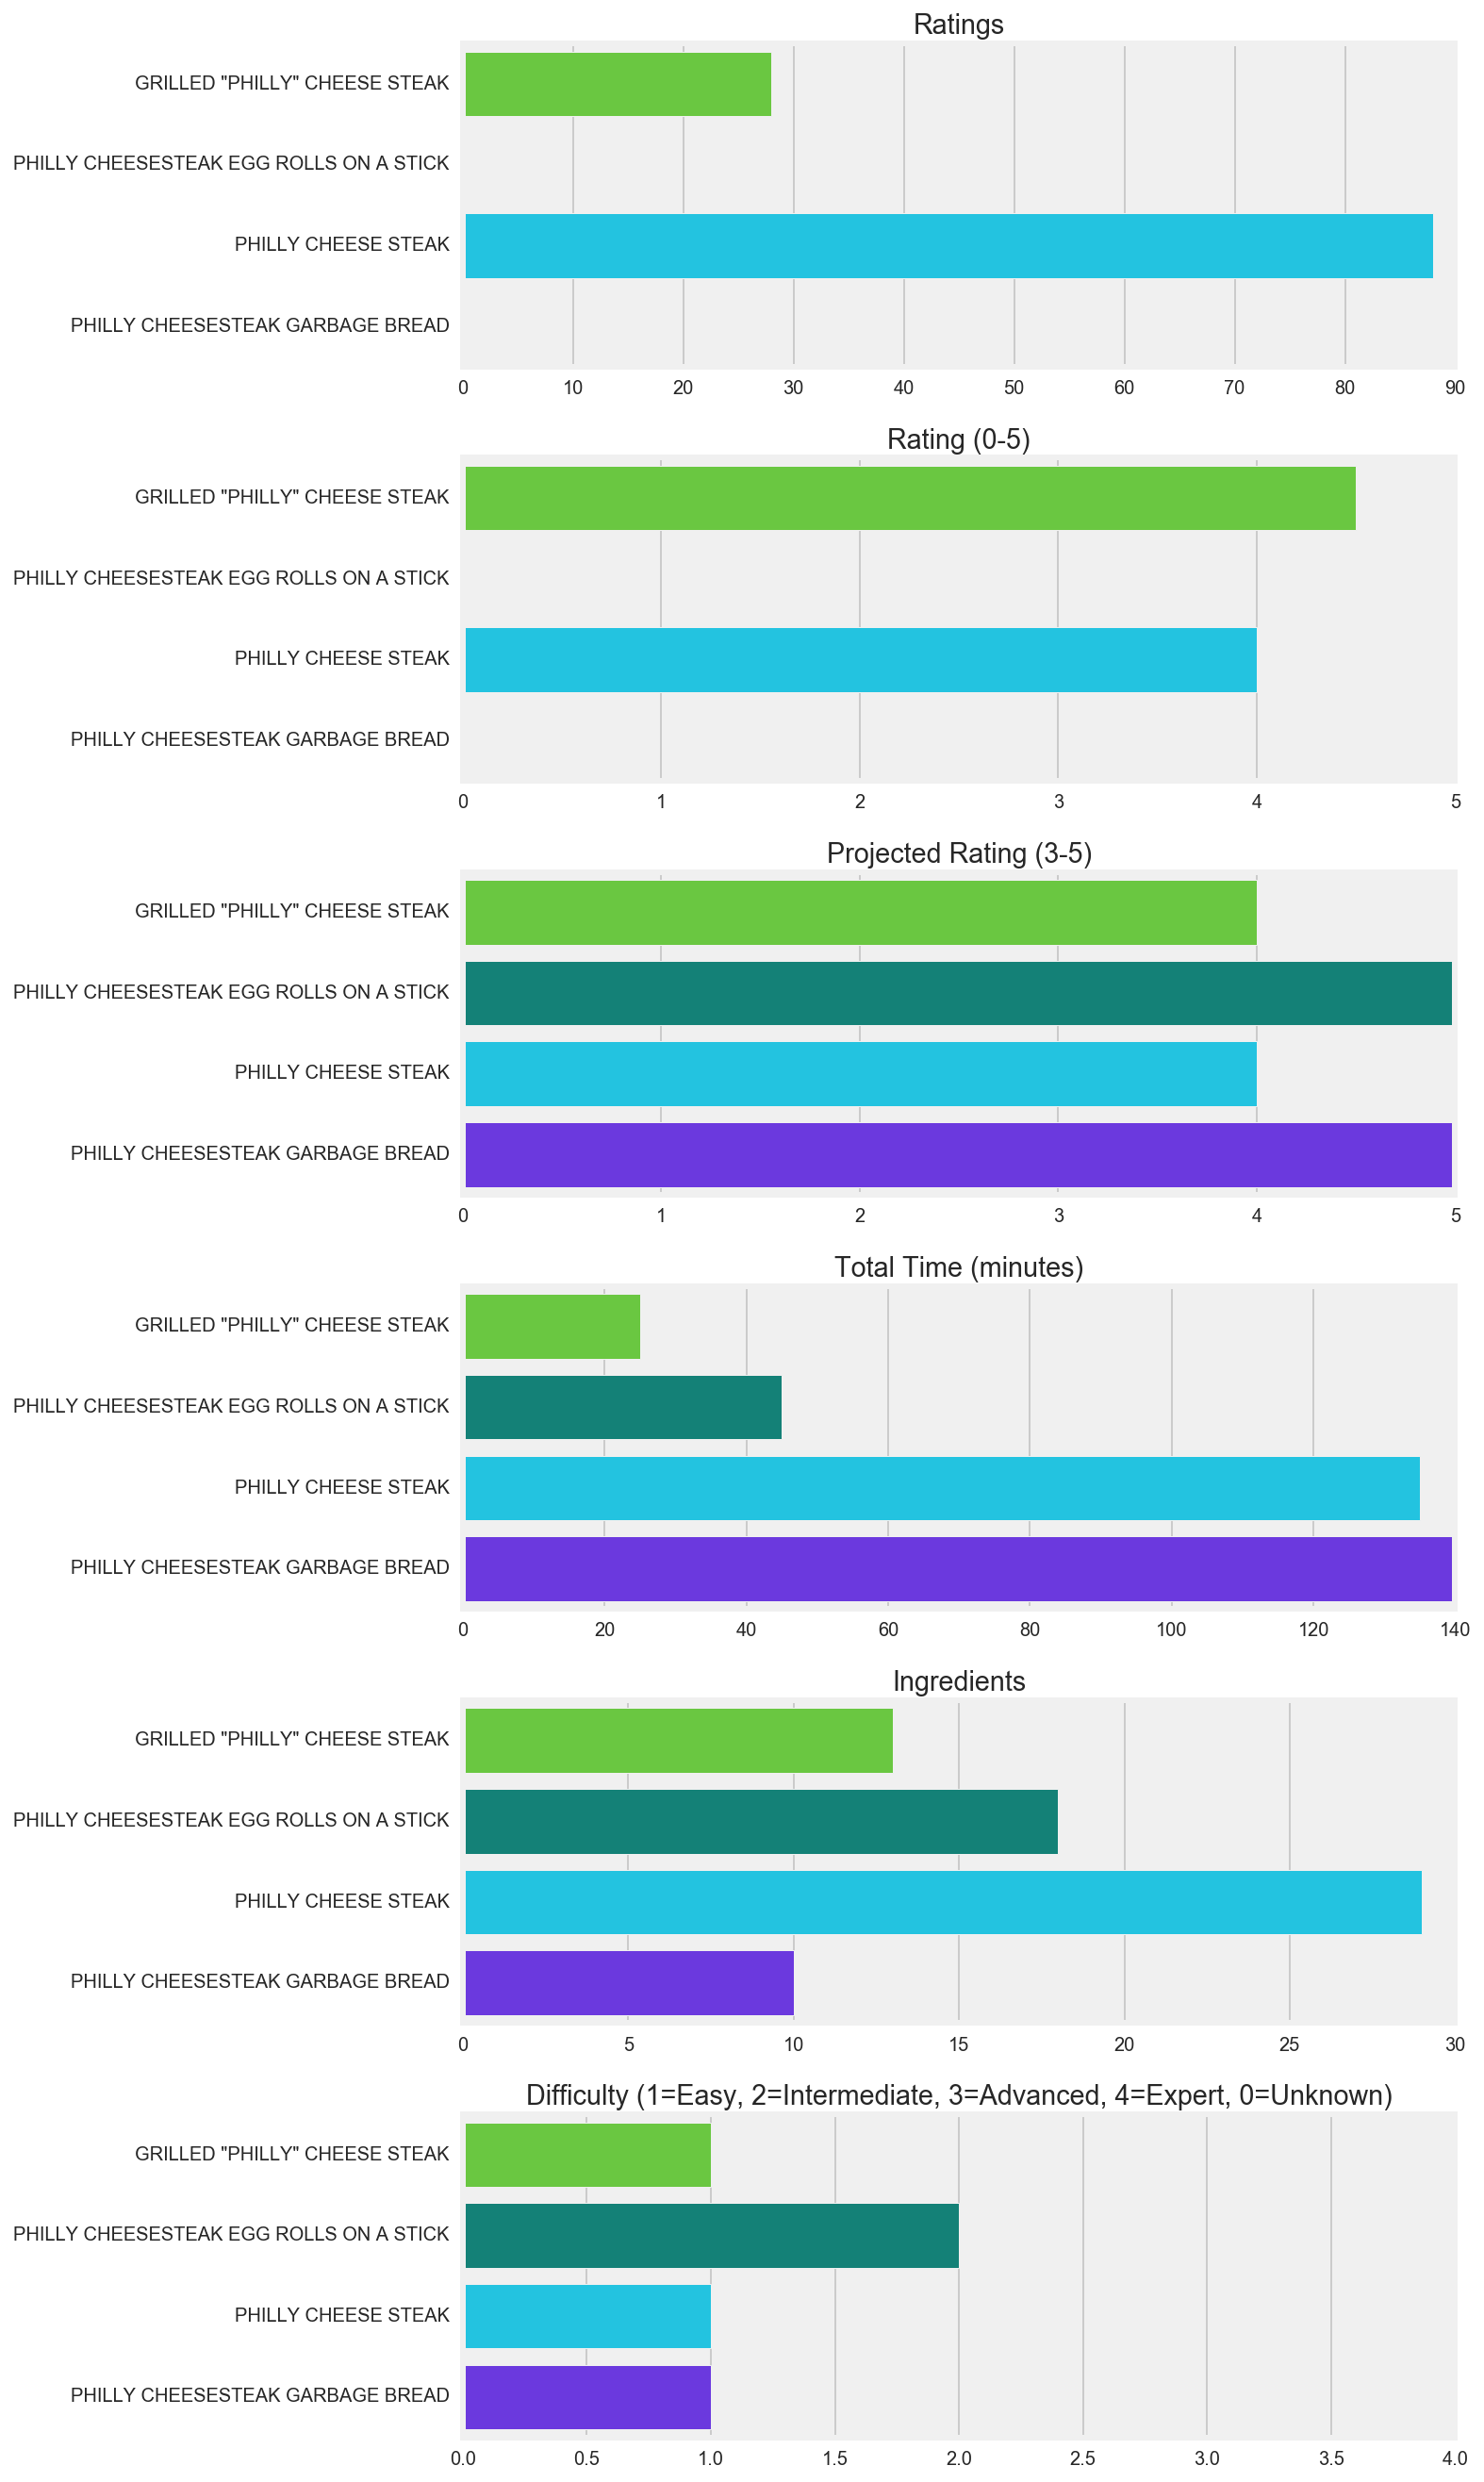

Recipe List
GRILLED "PHILLY" CHEESE STEAK
http://www.foodnetwork.com/recipes/bobby-flay/grilled-philly-cheese-steak-recipe.html 

PHILLY CHEESESTEAK EGG ROLLS ON A STICK
http://www.foodnetwork.com/recipes/philly-cheesesteak-egg-rolls-on-a-stick.html 

PHILLY CHEESE STEAK
http://www.foodnetwork.com/recipes/bobby-flay/philly-cheese-steak-recipe.html 

PHILLY CHEESESTEAK GARBAGE BREAD
http://www.foodnetwork.com/recipes/food-network-kitchens/philly-cheesesteak-garbage-bread.html 

Recipe Details
GRILLED "PHILLY" CHEESE STEAK 
from BOB FLAY 

Projected Rating: 4.0
Rating:  4.5
Ratings:  28.0 

Yield:  4 servings 

Ingredients:  13 

Difficulty Level: Easy
       Prep Time: 10.0
   Inactive Time: 5.0
       Cook Time: 10.0
           Total: 25.0 minutes

http://www.foodnetwork.com/recipes/bobby-flay/grilled-philly-cheese-steak-recipe.html 


PHILLY CHEESESTEAK EGG ROLLS ON A STICK 
from GIBSON BORELLI 

Projected Rating: 5.0
Rating:  0.0
Ratings:  0.0 

Yield:  8 egg rolls 

Ingredients:  18

In [38]:
food_network(recipes)



- Search recipes by ingredient, cuisine, type of food, or keyword!
 (e.g. tomato, salmon, mushroom, pizza, breakfast, asian, philly, carbonara, red velvet, scramble, etc.)
- Add as many ingredients/categories/keywords as you want!
- Once satisfied with the number recipes you have, hit 'return' to see your results

---------------
Search: watermelon
watermelon recipes:  257 
---------------
Search: feta
feta recipes:  23 
---------------
Search: cucumber
cucumber recipes:  5 
---------------
Search: 
Gathering recipes...

Select an ordering method:

1 --> user ratings (popularity)
2 --> user rating (quality)
3 --> projected rating    
4 --> time
5 --> ingredients
6 --> difficulty
hit 'return' to skip

Ordering Method: 3




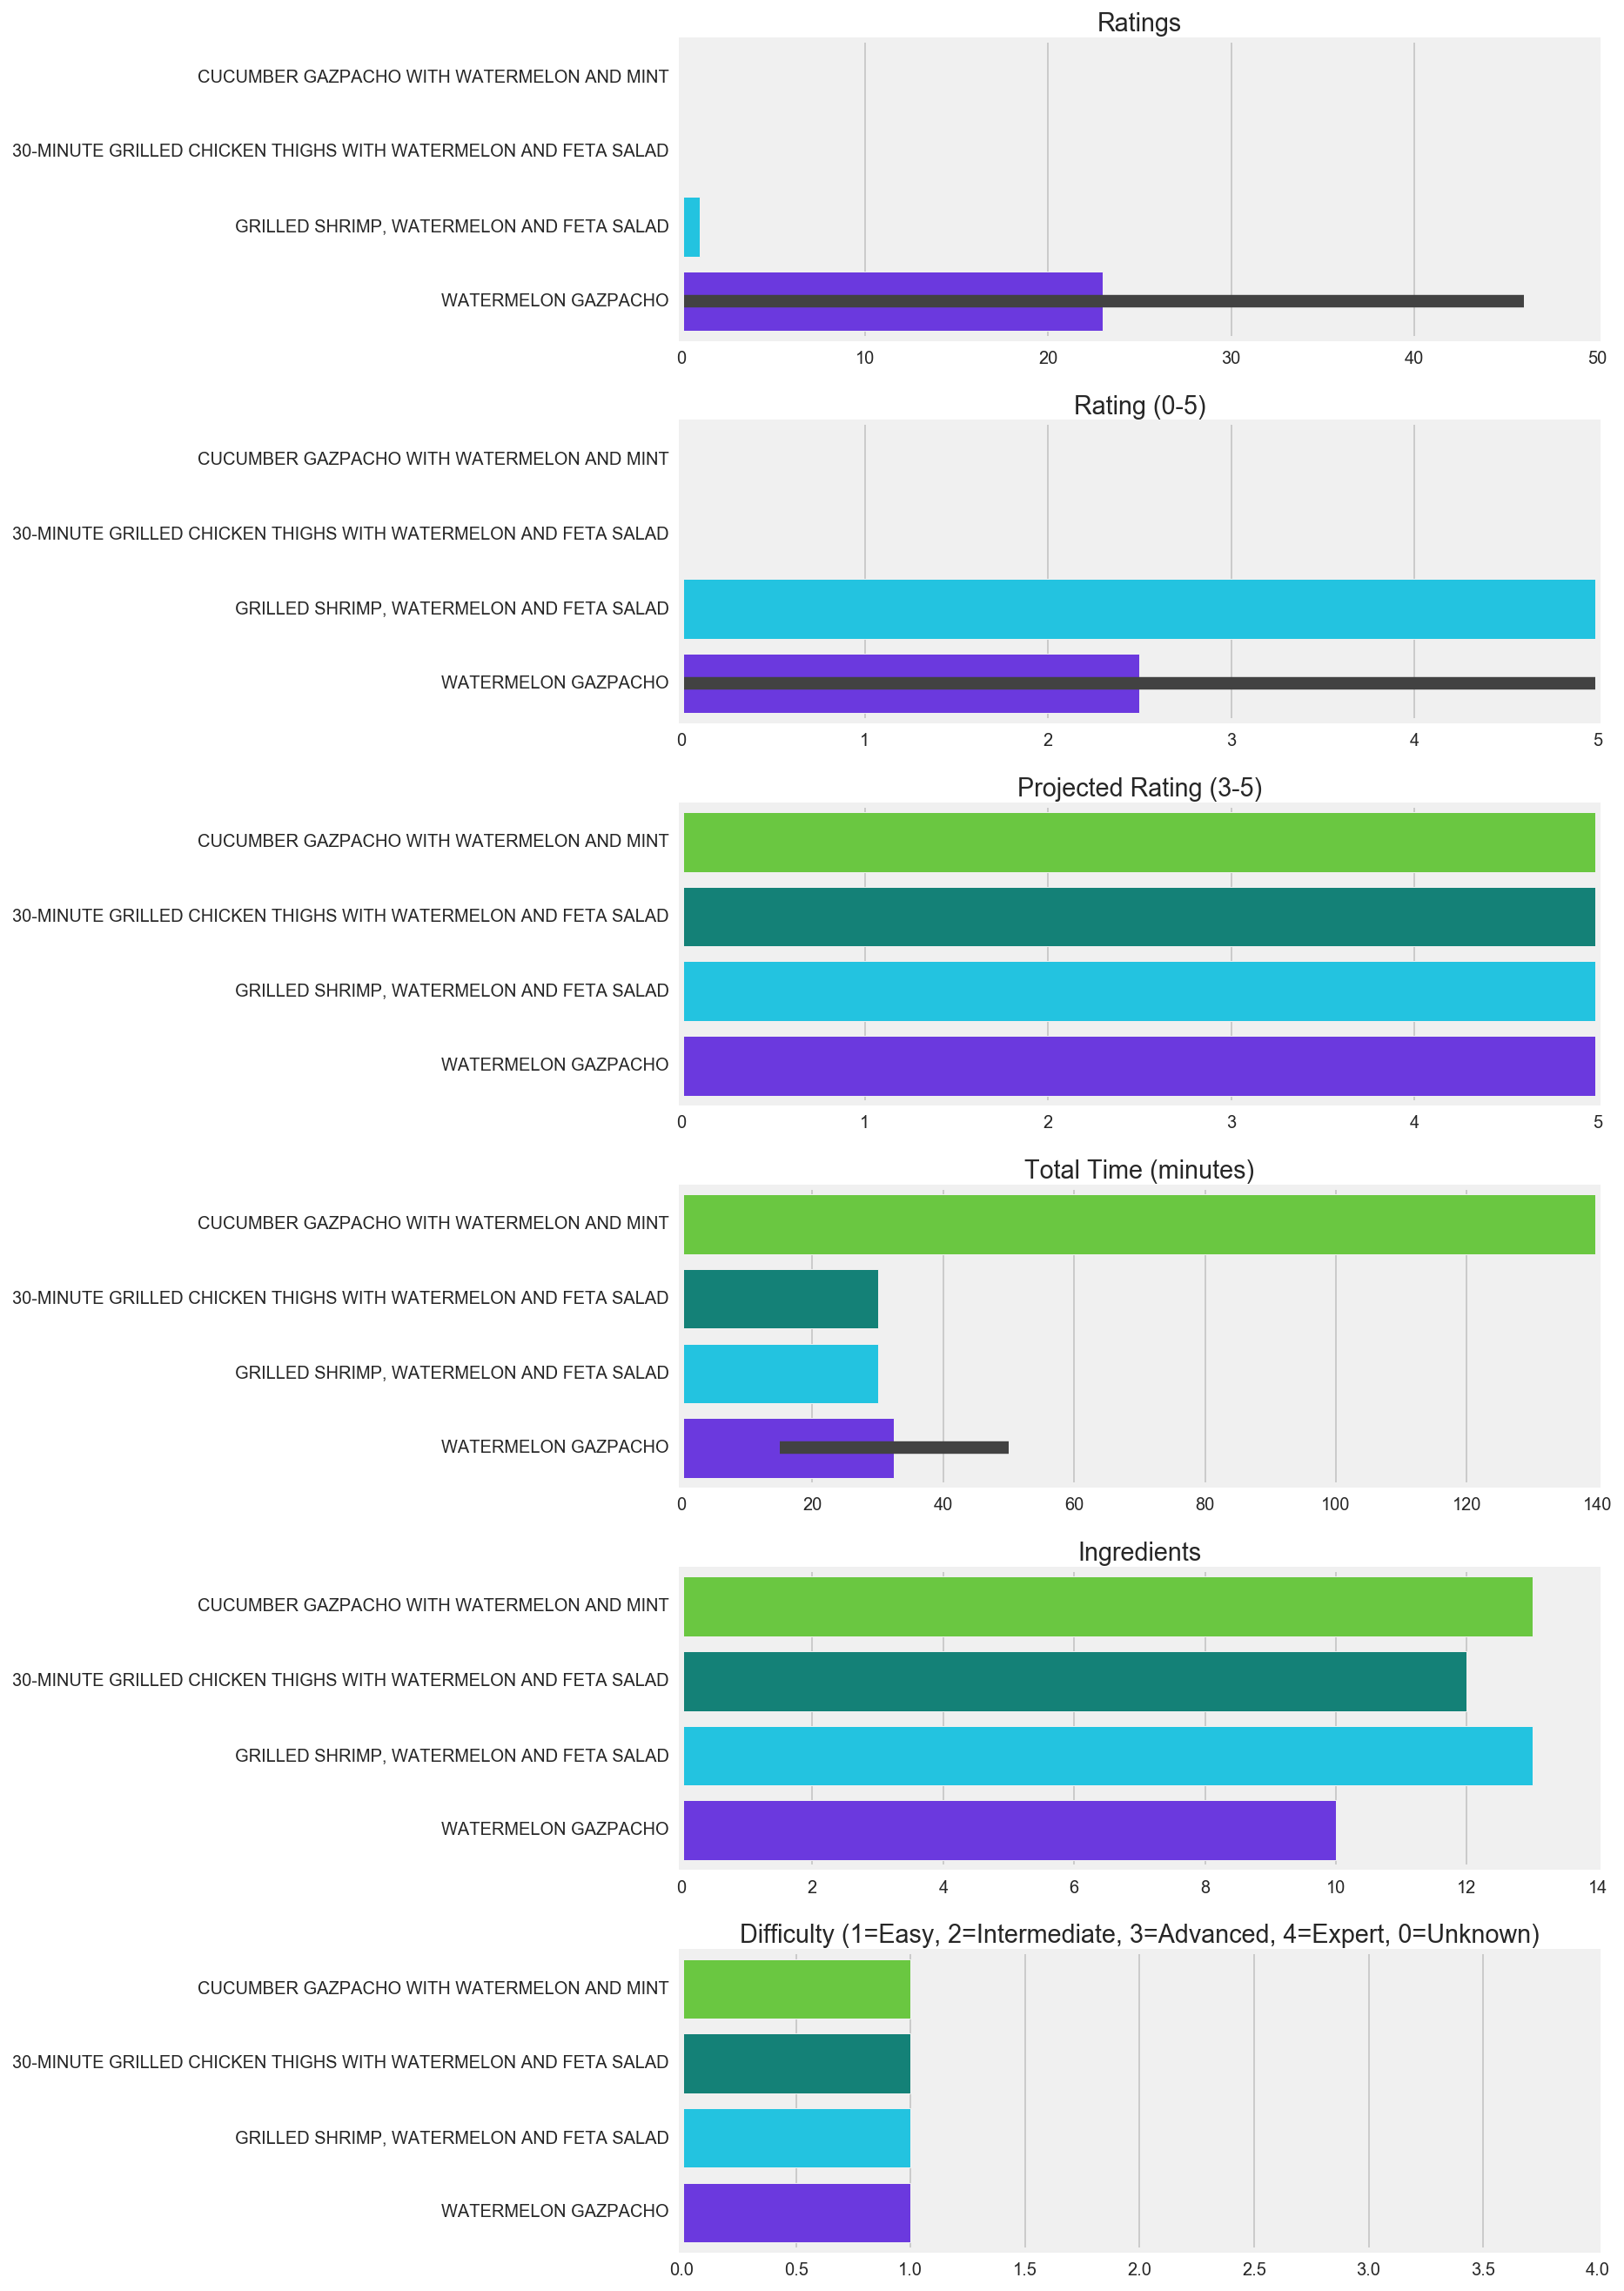

Recipe List
CUCUMBER GAZPACHO WITH WATERMELON AND MINT
http://www.foodnetwork.com/recipes/cucumber-gazpacho-with-watermelon-and-mint.html 

30-MINUTE GRILLED CHICKEN THIGHS WITH WATERMELON AND FETA SALAD
http://www.foodnetwork.com/recipes/food-network-kitchens/30-minute-grilled-chicken-thighs-with-watermelon-and-feta-salad.html 

GRILLED SHRIMP, WATERMELON AND FETA SALAD
http://www.foodnetwork.com/recipes/food-network-kitchens/grilled-shrimp-watermelon-and-feta-salad.html 

WATERMELON GAZPACHO
http://www.foodnetwork.com/recipes/tyler-florence/watermelon-gazpacho.html 

WATERMELON GAZPACHO
http://www.foodnetwork.com/recipes/tyler-florence/watermelon-gazpacho-recipe.html 

Recipe Details
CUCUMBER GAZPACHO WITH WATERMELON AND MINT 
from TIFFANI THIESSEN 

Projected Rating: 5.0
Rating:  0.0
Ratings:  0.0 

Yield:  6 servings 

Ingredients:  13 

Difficulty Level: Easy
       Prep Time: 20.0
   Inactive Time: 0.0
       Cook Time: 120.0
           Total: 140.0 minutes

http://www.foodnetwor

In [36]:
food_network(recipes)



- Search recipes by ingredient, cuisine, type of food, or keyword!
 (e.g. tomato, salmon, mushroom, pizza, breakfast, asian, philly, carbonara, red velvet, scramble, etc.)
- Add as many ingredients/categories/keywords as you want!
- Once satisfied with the number recipes you have, hit 'return' to see your results

---------------
Search: red velvet
red velvet recipes:  65 
---------------
Search: cupcake
cupcake recipes:  11 
---------------
Search: cream cheese
cream cheese recipes:  8 
---------------
Search: 
Gathering recipes...

Select an ordering method:

1 --> user ratings (popularity)
2 --> user rating (quality)
3 --> projected rating    
4 --> time
5 --> ingredients
6 --> difficulty
hit 'return' to skip

Ordering Method: 5




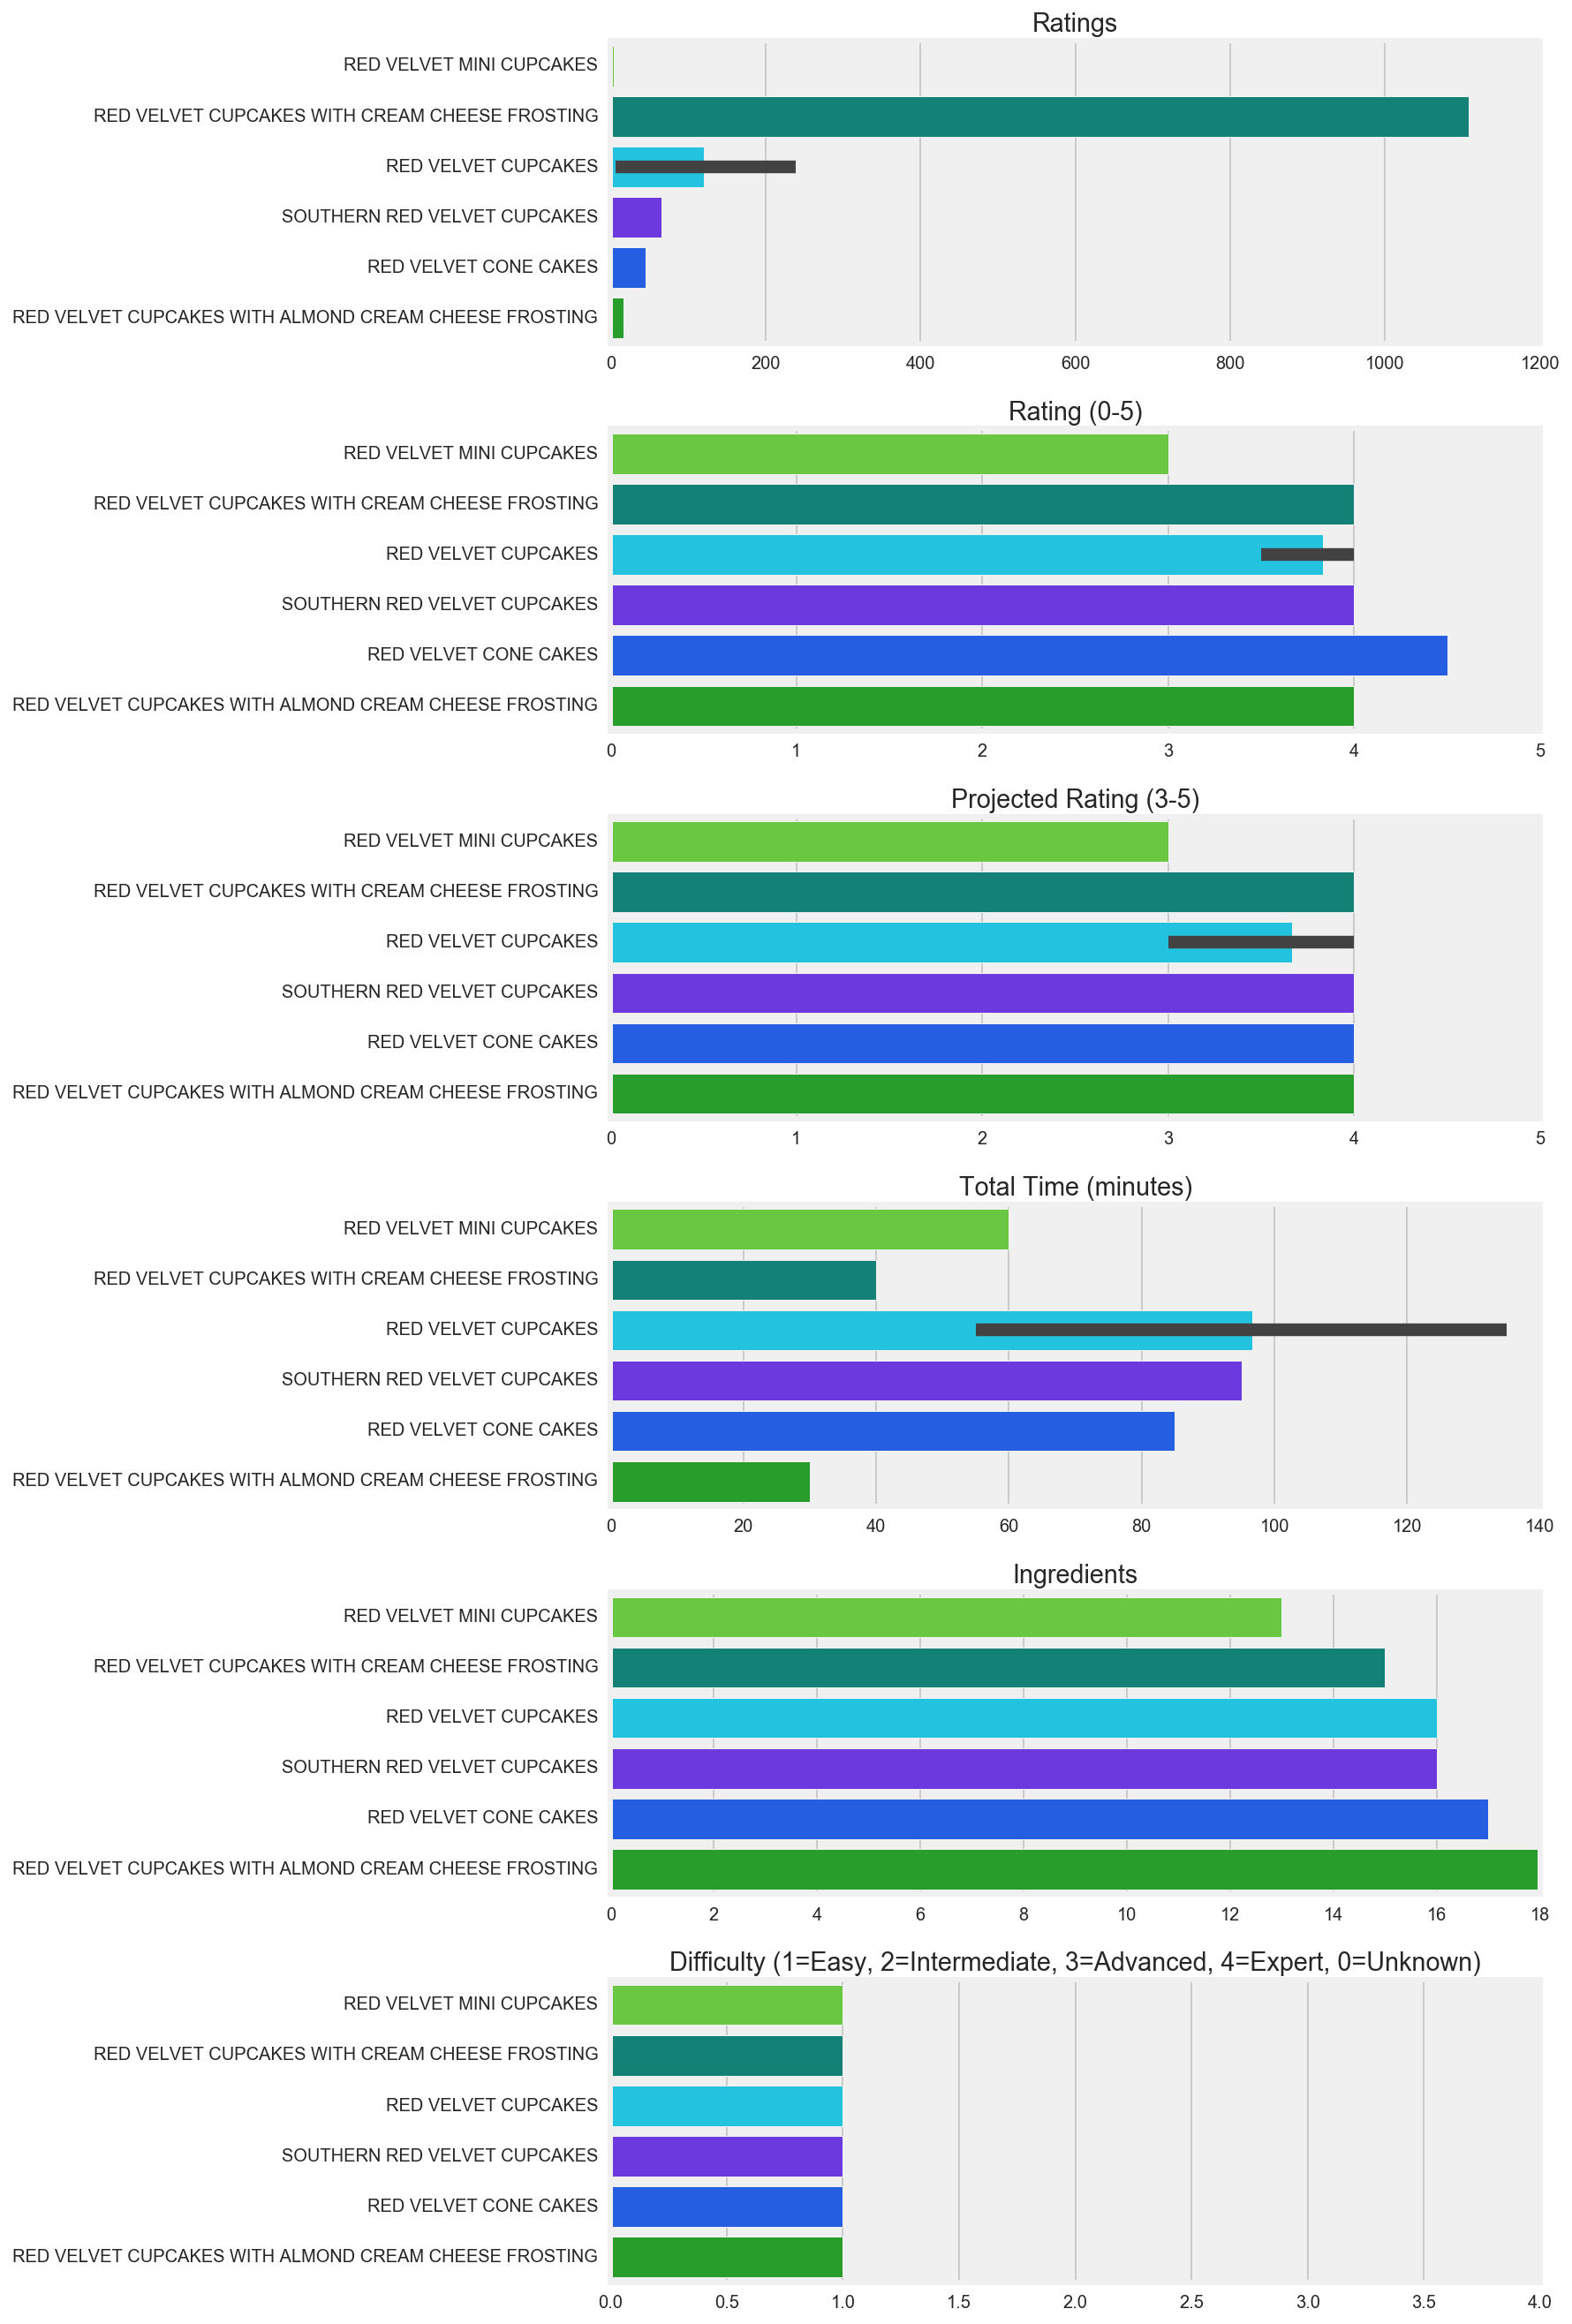

Recipe List
RED VELVET MINI CUPCAKES
http://www.foodnetwork.com/recipes/food-network-kitchens/red-velvet-mini-cupcakes-recipe.html 

RED VELVET CUPCAKES WITH CREAM CHEESE FROSTING
http://www.foodnetwork.com/recipes/paula-deen/red-velvet-cupcakes-with-cream-cheese-frosting-recipe.html 

RED VELVET CUPCAKES
http://www.foodnetwork.com/recipes/ina-garten/red-velvet-cupcakes-recipe.html 

RED VELVET CUPCAKES
http://www.foodnetwork.com/recipes/ina-garten/red-velvet-cupcakes.html 

RED VELVET CUPCAKES
http://www.foodnetwork.com/recipes/red-velvet-cupcakes-recipe.html 

SOUTHERN RED VELVET CUPCAKES
http://www.foodnetwork.com/recipes/southern-red-velvet-cupcakes-recipe.html 

RED VELVET CONE CAKES
http://www.foodnetwork.com/recipes/patrick-and-gina-neely/red-velvet-cone-cakes-recipe.html 

RED VELVET CUPCAKES WITH ALMOND CREAM CHEESE FROSTING
http://www.foodnetwork.com/recipes/red-velvet-cupcakes-with-almond-cream-cheese-frosting-recipe.html 

Recipe Details
RED VELVET MINI CUPCAKES 
from FOOD 

In [35]:
food_network(recipes)